# Import lib

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# *** Library ***
sys.path.append('./lib/')
import juice_cdf_lib as juice_cdf
import juice_hid2_lib as juice_hid2

In [2]:
# Latest CDF library: https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_notebook/ql/'   # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/'   # Data folder

# Setting and Read CDF file

In [3]:
# *** Mode set ***
spec_mode = 0                           # 0: low-resoltion   1: high-resolution
ave_mode = 0                            # 0: simple sum   1: FFT sum   2: median sum   3: min sum
hz_mode = 0                             # 0: sum    1: /Hz
cal_mode = 0                            # 0: raw    1: dBm＠ADC  2: V@HF   3:V2@HF   4:V2@HF
clean_mode = 0                          # 0: normal 1: noise cleaning

# *** Parameter set ***
cal = 0                                 # 0: background   1: cal
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.5                             # background: 8     CAL: 10
p_min = 1.5                             # background: 2.5   CAL: 5

# *** Conversion factor: cal_mode ***
cf = 0.0                                # Conversion Factor: RAW
if cal_mode == 1:
    cf = -104.1                         # dBm @ ADC 
elif cal_mode == 2:
    cf = -104.1 - 10.00 - 15.0          # V(amplitude) @ HF -- in EM2-1: HF-gain +15dB, ADC: 2Vpp  ==> EM2-3 & later: same [-6dB + 6dB]
elif cal_mode == 3:
    cf = -104.1 - 13.01 - 15.0          # V^2 @ HF (EM2-0 case)
elif cal_mode == 4:
    cf = -104.1 - 13.01 - 15.0 - 5.0    # V^2 @ RWIin -- temporary
# ******************************************************
# [EM2-0]
# "1-bit" = -104.1 dBm = -114.1 dB V  = 1.97E-6 V    ==> "20-bit": 2.06 Vpp
# "HF input"  +15dB(AMP) -3dB(50-ohm) = "+12dB"      ==> "1-bit": 5E-7 V,  Full: 0.5 Vpp
# ******************************************************
# [EM2-3]
# "1-bit" = -110.1 dBm = -110.1 dB V  = 0.99E-7 V "  ==> "20-bit": 1.03 Vpp
# "HF input"  +9dB(AMP)  -3dB(50-ohm受け) = "+6dB"    ==> "1-bit": 5E-7 V,  Full: 0.5 Vpp
# ******************************************************

# *** Max / Min in plots ***
p_max = p_max + cf/10
p_min = p_min + cf/10
if hz_mode == 1:
    p_max = p_max - 5.0
    p_min = p_min - 5.0
else:
    if spec_mode == 1:
        p_max = p_max - 1.5
        p_min = p_min - 1.5

In [4]:
# *** NECP ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T135849-20230419T141229_V01___RPR1_52000000_2023.109.16.17.21.607.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01___RPR1_52000001_2023.109.17.51.54.600.cdf'

# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100927-20230530T100937_V01___RPR1_52000011_2023.150.10.41.53.508.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T120759-20230601T120857_V01___RPR1_52000015_2023.152.12.32.12.471.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T121435-20230601T121533_V01___RPR1_52000016_2023.152.13.14.38.473.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122138-20230601T122236_V01___RPR1_52000017_2023.152.13.55.02.539.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122707-20230601T122805_V01___RPR1_52000018_2023.152.14.35.37.467.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T123416-20230601T123514_V01___RPR1_52000019_2023.152.15.15.55.483.cdf'

#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T090434-20230712T093848_V01___RPR1_52000001_2023.193.10.24.57.479.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T093942-20230712T101355_V01___RPR1_52000002_2023.194.08.38.36.474.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T101449-20230712T104147_V01___RPR1_52000003_2023.194.10.18.44.478.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T090434-20230712T104147_V01___HF_2023.194.cdf'
#
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T104149-20230712T232406_V01___RPR1_52000004_2023.194.11.15.35.498.cdf'
#
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T232408-20230712T235156_V01___RPR1_52000005_2023.195.09.10.17.486.cdf'
data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T235158-20230713T001854_V01___RPR1_52000006_2023.195.10.28.57.506.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T001856-20230713T004644_V01___RPR1_52000007_2023.195.11.42.37.540.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T004648-20230713T011342_V01___RPR1_52000008_2023.195.12.39.02.479.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T011436-20230713T014134_V01___RPR1_52000009_2023.195.13.03.08.470.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T014136-20230713T020924_V01___RPR1_5200000A_2023.195.13.25.22.477.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T020928-20230713T023718_V01___RPR1_5200000B_2023.195.13.47.46.500.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T023720-20230713T030416_V01___RPR1_5200000C_2023.195.14.10.35.574.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T030510-20230713T033208_V01___RPR1_5200000D_2023.195.14.33.20.470.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T033210-20230713T040000_V01___RPR1_5200000E_2023.195.14.55.41.474.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T040002-20230713T042751_V01___RPR1_5200000F_2023.195.15.18.00.472.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T042753-20230713T045449_V01___RPR1_52000010_2023.195.15.40.11.470.cdf'
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20230713T045543-20230713T050917_V01___RPR1_52000011_2023.195.16.14.20.468.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230712T232408-20230713T050917_V01___HF_2023.195.cdf'

# *** High-samp rate ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000304-20000101T000308_V01___TMIDX_00000_32.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000150-20000101T000154_V01___TMIDX_00000_64.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000355-20000101T000359_V01___TMIDX_00000_96.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000555-20000101T000559_V01___TMIDX_00000_128.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000725-20000101T000730_V01___TMIDX_00000_256.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000131-20000101T000139_V01___TMIDX_00000_512.bin.cdf'
#
# data_name = 'bad_NEW_PROCESSING_JUICE_L1a_RPWI-HF-SID2_20000101T000114-20000101T000210_V01___TMIDX_00000.bin.cdf'

# *** High-samp rate: Tsuchiya ***
#data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000050-20000101T000454_V01___HF_SID2_032_20230624-1132.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000031-20000101T000940_V01___HF_SID2_064_20230624-1139.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000111-20000101T000150_V01___HF_SID2_128_20230624-1306.ccs.cdf'

# *** Ver.2 ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01___HF_20210920-1007.ccs.cdf'

cdf_file = data_dir + data_name
# %ls $data_dir
%ls $cdf_file

/Users/user/0-python/JUICE_GS_test/cdf/JUICE_L1a_RPWI-HF-SID2_20230712T235158-20230713T001854_V01___RPR1_52000006_2023.195.10.28.57.506.cdf


# get SID-2 data

In [5]:
cdf = pycdf.CDF(cdf_file)
data = juice_hid2.hf_sid02_getdata(cdf)
print(data.epoch[0], "-", data.epoch[-1])

date = data.epoch[0]
month = date.strftime('%Y%m')

### SPECIAL: 202307 -- data shift -16
if month == "202307":
    data.Eu_i = np.roll(data.Eu_i, -16)
    data.Eu_q = np.roll(data.Eu_q, -16)
    data.Ev_i = np.roll(data.Ev_i, -16)
    data.Ev_q = np.roll(data.Ev_q, -16)
    data.Ew_i = np.roll(data.Ew_i, -16)
    data.Ew_q = np.roll(data.Ew_q, -16)
    print("-16 shift in 202307 data")
### SPECIAL: 202307 -- data shift -16

2023-07-12 23:51:58.245453 - 2023-07-13 00:18:54.208054
-16 shift in 202307 data


# Raw data

2023/07/12


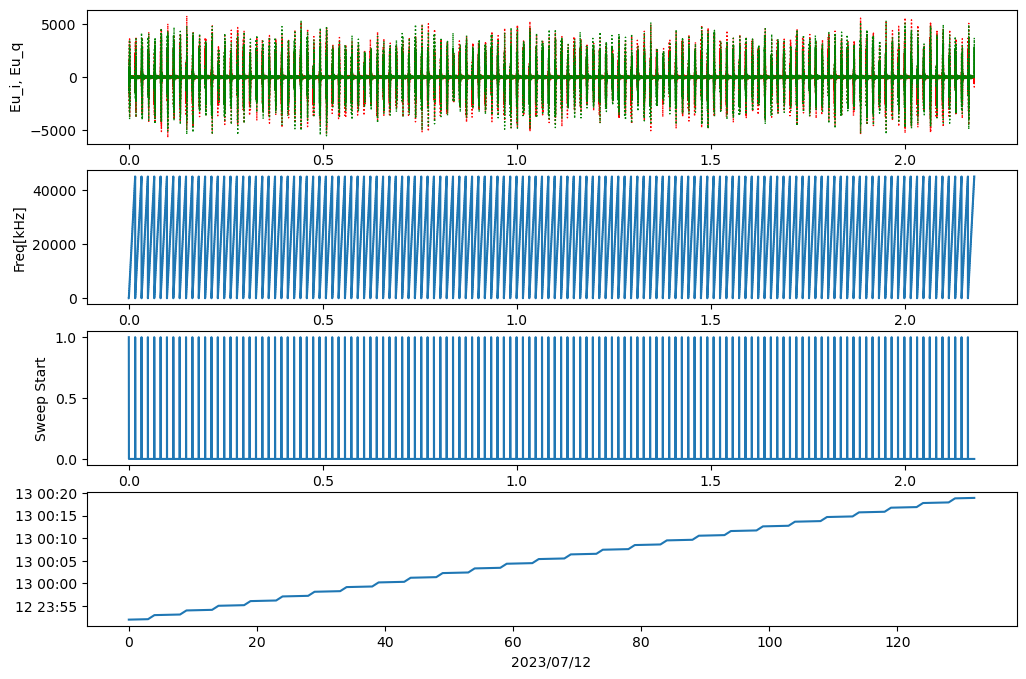

In [6]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(data.Eu_i), '-r', linewidth=1)
ax1.plot(np.ravel(data.Eu_q), '-g', linewidth=1)
ax1.plot(np.ravel(data.Ev_i), '--r', linewidth=1)
ax1.plot(np.ravel(data.Ev_q), '--g', linewidth=1)
ax1.plot(np.ravel(data.Ew_i), ':r', linewidth=1)
ax1.plot(np.ravel(data.Ew_q), ':g', linewidth=1)
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.sweep_start))
ax4.plot(np.ravel(data.epoch))
#
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
print(date)

ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')
ax4.set_xlabel(date)

"""
# SPECIAL -- data check
# X-axis
xlim=[40*32, 41*32]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
#
# Y-axis
ylim=[-400, +400]
ax1.set_ylim(ylim)
# SPECIAL -- data check
"""

# Plot
plt.show()
png_fname = work_dir+data_name+'_raw.png'
# fig.savefig(png_fname)

In [7]:
# Spec mode:           0: low resolution  1; high resolution  
spec = juice_hid2.hf_sid02_getspec(data, spec_mode, hz_mode, ave_mode)
power_str = juice_cdf.power_label(cal_mode, hz_mode)
#
n_time = spec.Eu_power.shape[1]
n_freq = spec.Eu_power.shape[0]
print("n_time:", n_time)
print("n_freq:", n_freq, n_freq/512)

if clean_mode > 0:   # 0: normal          1: noise cleaning
    spec.Eu_power = juice_cdf.clean_rfi(spec.Eu_power, 7)
    spec.Ev_power = juice_cdf.clean_rfi(spec.Ev_power, 7)
    spec.Ew_power = juice_cdf.clean_rfi(spec.Ew_power, 7)

# cf: Conversion factor
spec.Eu_power = spec.Eu_power * 10**(cf/10)
spec.Ev_power = spec.Ev_power * 10**(cf/10)
spec.Ew_power = spec.Ew_power * 10**(cf/10)

# average
freq_ave = np.mean(spec.frequency, axis=1)
Eu_ave = np.mean(spec.Eu_power, axis=1)
Ev_ave = np.mean(spec.Ev_power, axis=1)
Ew_ave = np.mean(spec.Ew_power, axis=1)

# median
freq_med = np.median(spec.frequency, axis=1)
Eu_med = np.median(spec.Eu_power, axis=1)
Ev_med = np.median(spec.Ev_power, axis=1)
Ew_med = np.median(spec.Ew_power, axis=1)

n_time: 133
n_freq: 512 1.0


# Spectra

# LOG: Frequency - Power

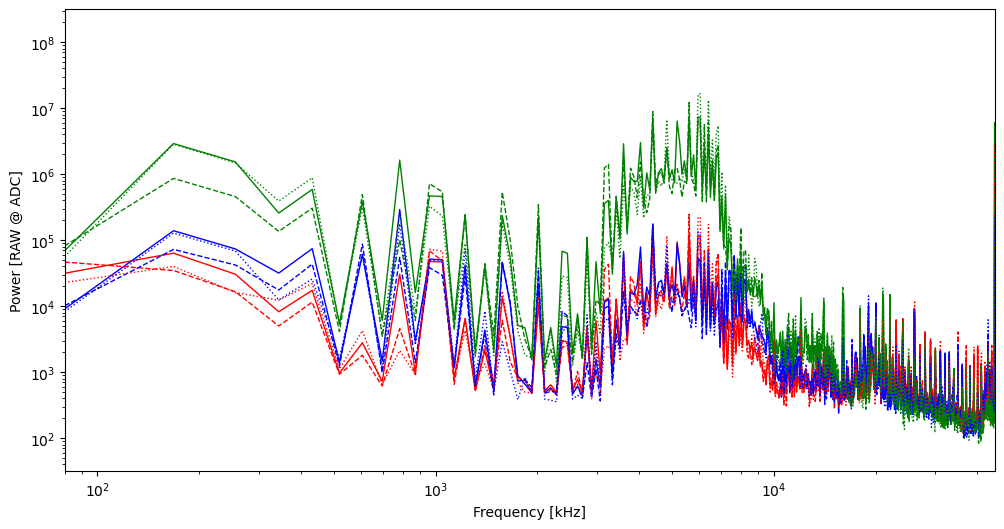

In [8]:
fig = plt.figure(figsize=(12, 6))

if spec_mode == 0:
    plt.plot(freq_ave, Eu_ave, '-r', linewidth=1)
    plt.plot(freq_ave, Ev_ave, '-b', linewidth=1)
    plt.plot(freq_ave, Ew_ave, '-g', linewidth=1)
    plt.plot(spec.frequency[:,0], spec.Eu_power[:,0], '--r', linewidth=1)
    plt.plot(spec.frequency[:,0], spec.Ev_power[:,0], '--b', linewidth=1)
    plt.plot(spec.frequency[:,0], spec.Ew_power[:,0], '--g', linewidth=1)
    plt.plot(spec.frequency[:,n_time-1], spec.Eu_power[:,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[:,n_time-1], spec.Ev_power[:,n_time-1], ':b', linewidth=1)
    plt.plot(spec.frequency[:,n_time-1], spec.Ew_power[:,n_time-1], ':g', linewidth=1)
else:
    n_samp = np.int16(spec.n_samp * 1.9)
    n_samp = np.int16(spec.n_samp * 0.75)
    n_samp = np.int16(spec.n_samp * 0.66)
    for i in range(spec.n_step):
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Eu_ave[i*n_samp:(i+1)*n_samp], '-r', linewidth=1)
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ev_ave[i*n_samp:(i+1)*n_samp], '-b', linewidth=1)
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ew_ave[i*n_samp:(i+1)*n_samp], '-g', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Eu_power[i*n_samp:(i+1)*n_samp,0], '--r', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ev_power[i*n_samp:(i+1)*n_samp,0], '--b', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ew_power[i*n_samp:(i+1)*n_samp,0], '--g', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Eu_power[i*n_samp:(i+1)*n_samp,n_time-1], ':r', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ev_power[i*n_samp:(i+1)*n_samp,n_time-1], ':b', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ew_power[i*n_samp:(i+1)*n_samp,n_time-1], ':g', linewidth=1)
plt.xlabel('Frequency [kHz]')
plt.xscale('log')
plt.xlim(f_min, f_max)

plt.yscale('log')
plt.ylabel(power_str)
plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec-log_h.png'
fig.savefig(png_fname)

# Linear: Frequency - Power

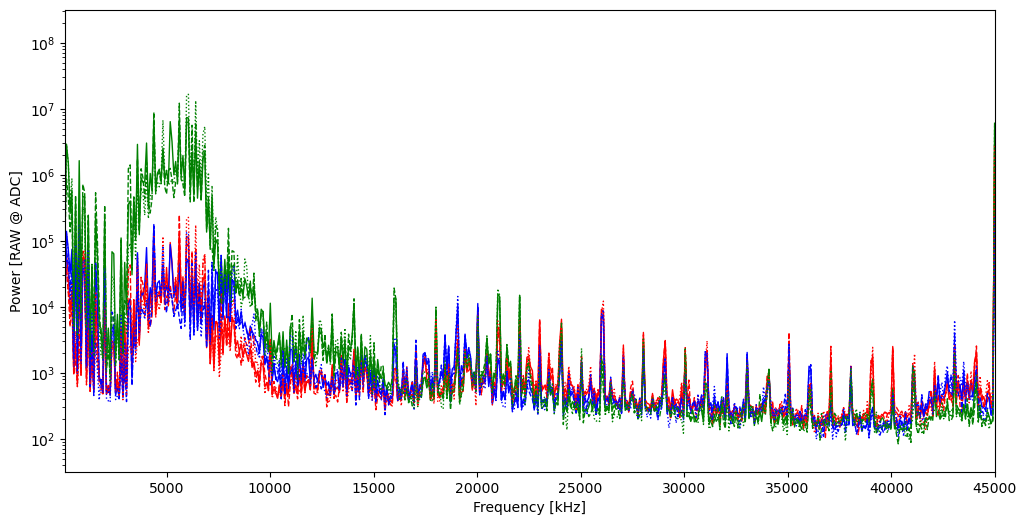

In [9]:
fig = plt.figure(figsize=(12, 6))

if spec_mode == 0:
    plt.plot(freq_ave, Eu_ave, '-r', linewidth=1)
    plt.plot(freq_ave, Ev_ave, '-b', linewidth=1)
    plt.plot(freq_ave, Ew_ave, '-g', linewidth=1)
    plt.plot(spec.frequency[:,0], spec.Eu_power[:,0], '--r', linewidth=1)
    plt.plot(spec.frequency[:,0], spec.Ev_power[:,0], '--b', linewidth=1)
    plt.plot(spec.frequency[:,0], spec.Ew_power[:,0], '--g', linewidth=1)
    plt.plot(spec.frequency[:,n_time-1], spec.Eu_power[:,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[:,n_time-1], spec.Ev_power[:,n_time-1], ':b', linewidth=1)
    plt.plot(spec.frequency[:,n_time-1], spec.Ew_power[:,n_time-1], ':g', linewidth=1)
else:
    n_samp = np.int16(spec.n_samp * 1.0)
    n_samp = np.int16(spec.n_samp * 0.75)
    n_samp = np.int16(spec.n_samp * 0.66)
    for i in range(spec.n_step):
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Eu_ave[i*n_samp:(i+1)*n_samp], '-r', linewidth=1)
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ev_ave[i*n_samp:(i+1)*n_samp], '-b', linewidth=1)
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ew_ave[i*n_samp:(i+1)*n_samp], '-g', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Eu_power[i*n_samp:(i+1)*n_samp,0], '--r', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ev_power[i*n_samp:(i+1)*n_samp,0], '--b', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ew_power[i*n_samp:(i+1)*n_samp,0], '--g', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Eu_power[i*n_samp:(i+1)*n_samp,n_time-1], ':r', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ev_power[i*n_samp:(i+1)*n_samp,n_time-1], ':b', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ew_power[i*n_samp:(i+1)*n_samp,n_time-1], ':g', linewidth=1)
plt.xlabel('Frequency [kHz]')
plt.xlim(f_min, f_max)

plt.yscale('log')
plt.ylabel(power_str)
plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec_h.png'
fig.savefig(png_fname)

# LOG: Frequency - Time

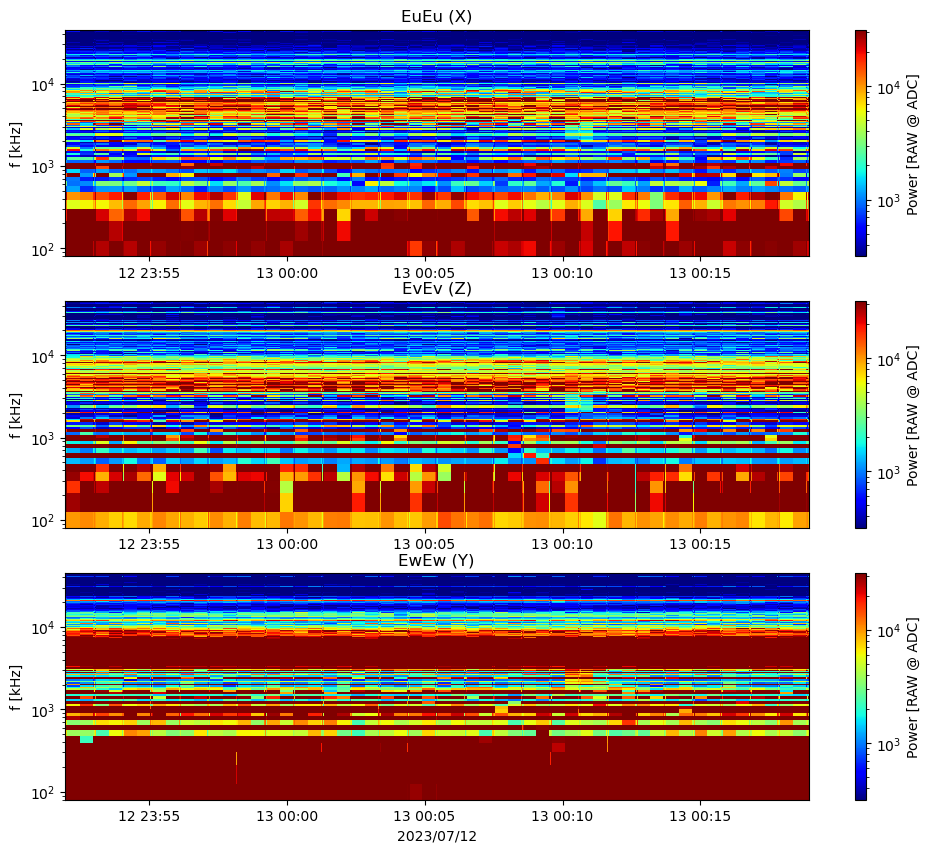

In [10]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**(p_min+1), vmax=10**(p_max-4)), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**(p_min+1), vmax=10**(p_max-4)), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**(p_min+1), vmax=10**(p_max-4)), cmap='jet')

pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(power_str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(power_str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(power_str)

png_fname = work_dir+data_name+'_FT-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-log_h.png'
fig.savefig(png_fname)


# Linear: Frequency - Time

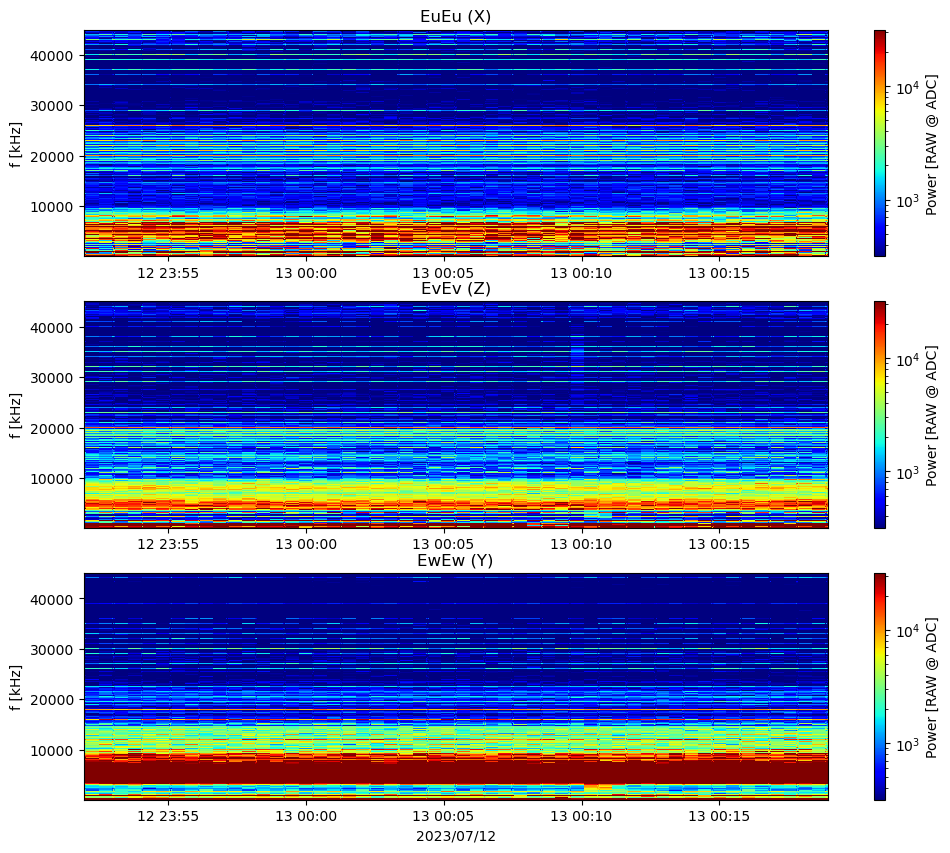

In [11]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**(p_min+1), vmax=10**(p_max-4)), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**(p_min+1), vmax=10**(p_max-4)), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**(p_min+1), vmax=10**(p_max-4)), cmap='jet')

pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(power_str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(power_str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(power_str)

png_fname = work_dir+data_name+'_FT.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT_h.png'
fig.savefig(png_fname)

In [12]:
# sys.exit()

# Analyses

In [13]:
# Antenna Effecitve Length from Fischer+ 2021
import csv

gain_dir = './lib/'
gain_name = 'juice_rwi_Effective_length_huvw_freq.csv'
gain_file = gain_dir + gain_name

with open(gain_file) as f:
    reader = csv.reader(f)
    gain_list = [row for row in reader]
gain_data = np.array(gain_list)
gain_data = gain_data.transpose()
gain_freq = np.float16(gain_data[0])*1000
gain_U = np.float16(gain_data[1]) ** 2
gain_V = np.float16(gain_data[2]) ** 2
gain_W = np.float16(gain_data[3]) ** 2

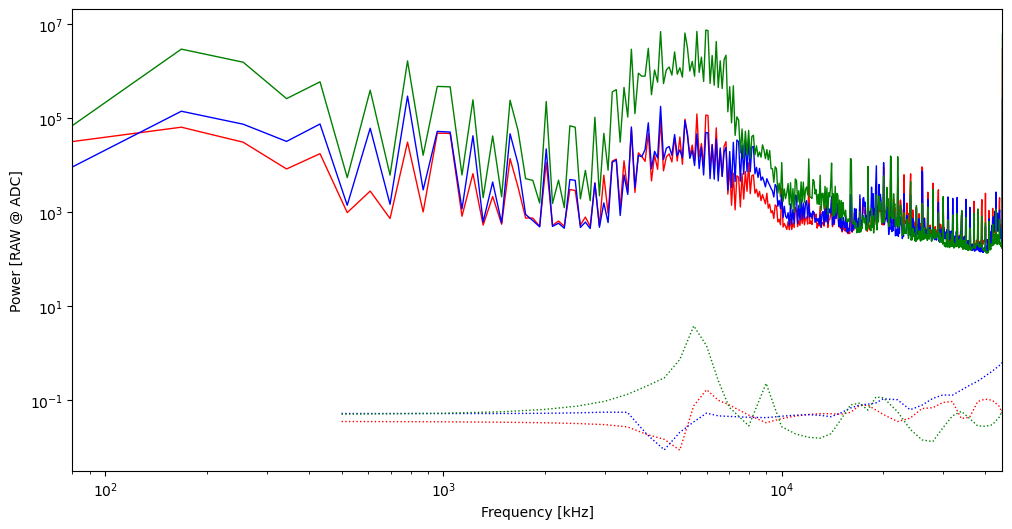

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.plot(gain_freq, gain_U, ':r', linewidth=1)
plt.plot(gain_freq, gain_V, ':b', linewidth=1)
plt.plot(gain_freq, gain_W, ':g', linewidth=1)

if spec_mode == 0:
    plt.plot(freq_ave, Eu_ave, '-r', linewidth=1)
    plt.plot(freq_ave, Ev_ave, '-b', linewidth=1)
    plt.plot(freq_ave, Ew_ave, '-g', linewidth=1)
else:
    n_samp = np.int16(spec.n_samp * 1.0)
    n_samp = np.int16(spec.n_samp * 0.75)
    n_samp = np.int16(spec.n_samp * 0.66)
    for i in range(spec.n_step):
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Eu_ave[i*n_samp:(i+1)*n_samp], '-r', linewidth=1)
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ev_ave[i*n_samp:(i+1)*n_samp], '-b', linewidth=1)
        plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ew_ave[i*n_samp:(i+1)*n_samp], '-g', linewidth=1)

plt.xscale('log')
plt.xlabel('Frequency [kHz]')
plt.xlim(f_min, f_max)

plt.yscale('log')
plt.ylabel('(ANT effective length)^2')
plt.ylabel(power_str)
# plt.ylim(10**p_min, 10**p_max)
# plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_ant-gain.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_ant-gain-h.png'
fig.savefig(png_fname)

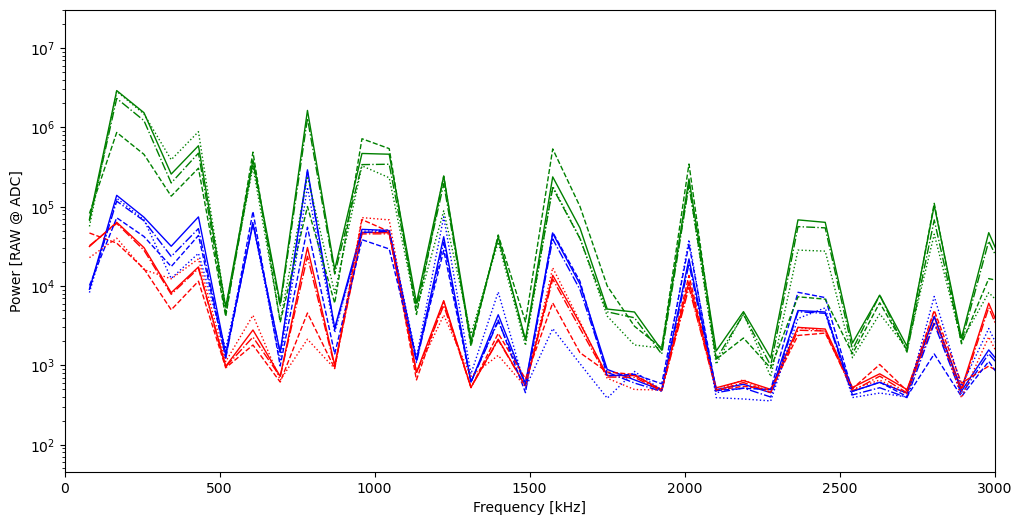

In [15]:
fig = plt.figure(figsize=(12, 6))
ch_min = 0
ch_max = 512
f_min0 = 0
f_max0 = 3000

if spec_mode == 0:
    plt.plot(freq_ave[ch_min:ch_max+1], Eu_ave[ch_min:ch_max+1], '-r', linewidth=1)
    plt.plot(freq_ave[ch_min:ch_max+1], Ev_ave[ch_min:ch_max+1], '-b', linewidth=1)
    plt.plot(freq_ave[ch_min:ch_max+1], Ew_ave[ch_min:ch_max+1], '-g', linewidth=1)
    plt.plot(freq_med[ch_min:ch_max+1], Eu_med[ch_min:ch_max+1], '-.r', linewidth=1)
    plt.plot(freq_med[ch_min:ch_max+1], Ev_med[ch_min:ch_max+1], '-.b', linewidth=1)
    plt.plot(freq_med[ch_min:ch_max+1], Ew_med[ch_min:ch_max+1], '-.g', linewidth=1)

    plt.plot(spec.frequency[ch_min:ch_max+1,0], spec.Eu_power[ch_min:ch_max+1,0], '--r', linewidth=1)
    plt.plot(spec.frequency[ch_min:ch_max+1,0], spec.Ev_power[ch_min:ch_max+1,0], '--b', linewidth=1)
    plt.plot(spec.frequency[ch_min:ch_max+1,0], spec.Ew_power[ch_min:ch_max+1,0], '--g', linewidth=1)
    plt.plot(spec.frequency[ch_min:ch_max+1,n_time-1], spec.Eu_power[ch_min:ch_max+1,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[ch_min:ch_max+1,n_time-1], spec.Ev_power[ch_min:ch_max+1,n_time-1], ':b', linewidth=1)
    plt.plot(spec.frequency[ch_min:ch_max+1,n_time-1], spec.Ew_power[ch_min:ch_max+1,n_time-1], ':g', linewidth=1)
    
else:
    n_samp = np.int16(spec.n_samp * 1.00)
    n_samp = np.int16(spec.n_samp * 0.75)
    n_samp = np.int16(spec.n_samp * 0.66)
    for i in range(spec.n_step):
        if i>=ch_min and i<=ch_max:
            # print(freq_ave[i*n_samp:(i+1)*n_samp])
            plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Eu_ave[i*n_samp:(i+1)*n_samp], '-r', linewidth=1)
            plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ev_ave[i*n_samp:(i+1)*n_samp], '-b', linewidth=1)
            plt.plot(freq_ave[i*n_samp:(i+1)*n_samp], Ew_ave[i*n_samp:(i+1)*n_samp], '-g', linewidth=1)
            plt.plot(freq_med[i*n_samp:(i+1)*n_samp], Eu_med[i*n_samp:(i+1)*n_samp], '-.r', linewidth=1)
            plt.plot(freq_med[i*n_samp:(i+1)*n_samp], Ev_med[i*n_samp:(i+1)*n_samp], '-.b', linewidth=1)
            plt.plot(freq_med[i*n_samp:(i+1)*n_samp], Ew_med[i*n_samp:(i+1)*n_samp], '-.g', linewidth=1)

            plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Eu_power[i*n_samp:(i+1)*n_samp,0], '--r', linewidth=1)
            plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ev_power[i*n_samp:(i+1)*n_samp,0], '--b', linewidth=1)
            plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ew_power[i*n_samp:(i+1)*n_samp,0], '--g', linewidth=1)
            plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Eu_power[i*n_samp:(i+1)*n_samp,n_time-1], ':r', linewidth=1)
            plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ev_power[i*n_samp:(i+1)*n_samp,n_time-1], ':b', linewidth=1)
            plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ew_power[i*n_samp:(i+1)*n_samp,n_time-1], ':g', linewidth=1)

plt.xlabel('Frequency [kHz]')
plt.xlim(f_min0, f_max0)

plt.yscale('log')
plt.ylabel(power_str)
# plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec-a.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec_h-a.png'
fig.savefig(png_fname)

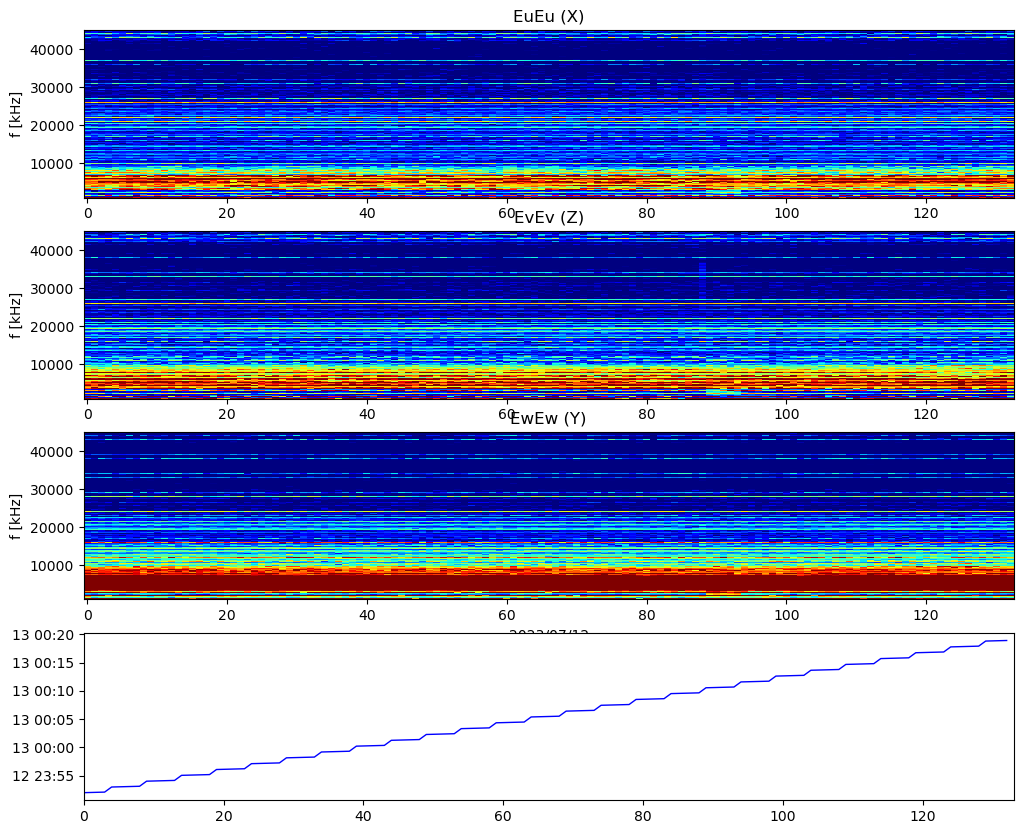

In [16]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
ax1.set_ylim(1000, 45000)
ax2.set_ylim(1000, 45000)
ax3.set_ylim(1000, 45000)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
#
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p_min0 = p_min+1
p_max0 = p_max-4

# """
# X: n_data
p1 = ax1.pcolormesh(data.n_data, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p2 = ax2.pcolormesh(data.n_data, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p3 = ax3.pcolormesh(data.n_data, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
"""
# X: EPOCH
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
"""

# colbar
"""
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(power_str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(power_str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(power_str)
"""

# """
# if X: n_data
ax4 = fig.add_subplot(4, 1, 4)
p4 = ax4.plot(data.n_data, data.epoch, '-b', linewidth=1)
ax4.set_xlim(0, len(data.n_data))
# pp4 = fig.colorbar(p4, ax=ax4, orientation="vertical")
# pp4.set_label(power_str)
# """

png_fname = work_dir+data_name+'_FT-a.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-h-a.png'
fig.savefig(png_fname)